1. AOC
2. ROC
3. precision recall F1 score
4. Confusion matrix
5. heat map of all confusion matrix
6.accuracy v/s losss graph


# USING ANN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv('C:/Users/Aditi Singh/Desktop/VoiceGender/Dataset/voice.csv')

In [3]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [4]:
pd.set_option('display.max_columns', None) #Displays all the columns

In [5]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [6]:
data.info() #Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

## Encoding the labels

In [7]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [8]:
dict(enumerate(label_encoder.classes_)) #To make sure which value maps to which

{0: 'female', 1: 'male'}

In [9]:
data


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


## Histogram

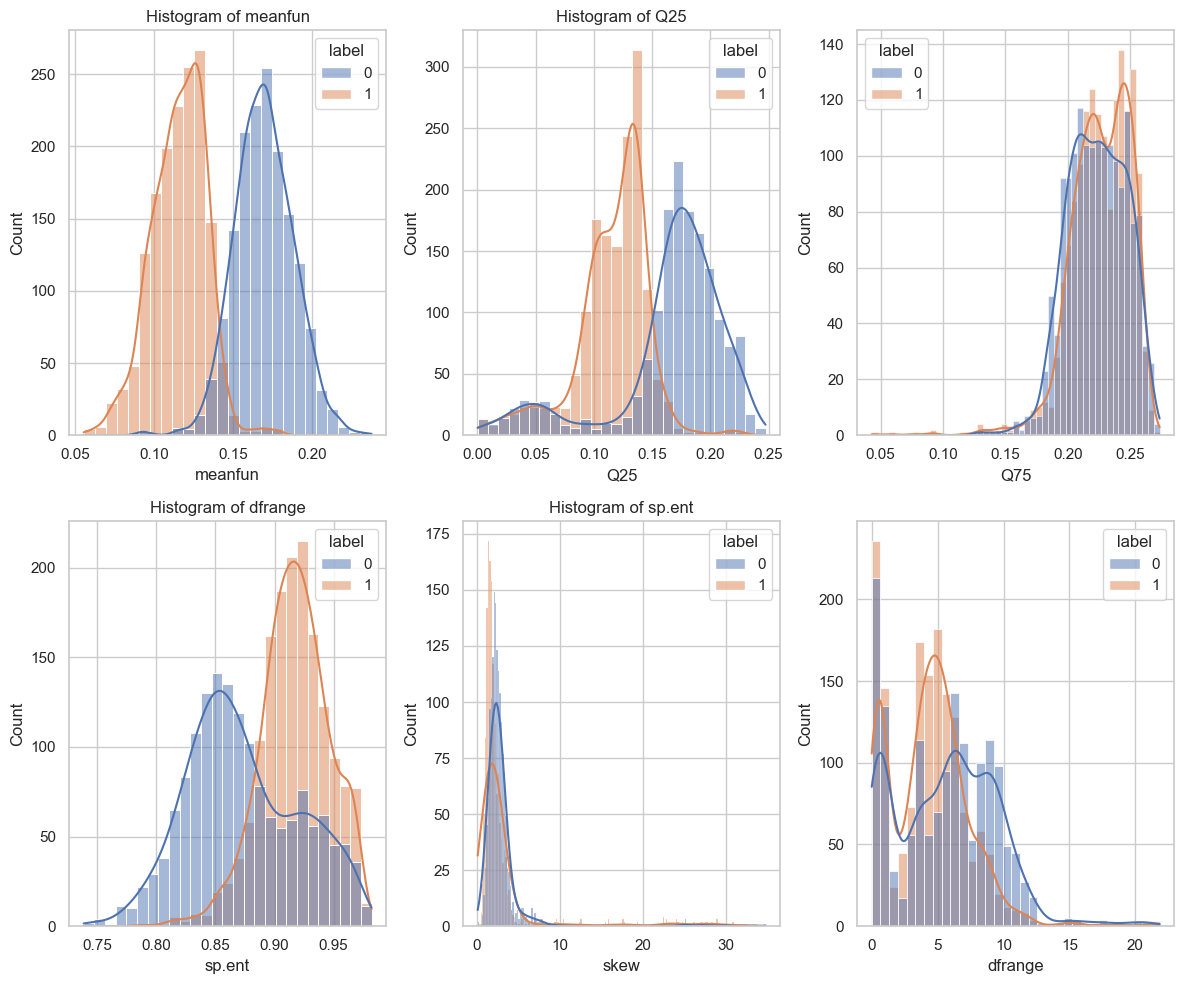

In [10]:
sns.set(style="whitegrid")

# Prepare the figure
fig, axes = plt.subplots(2, 3, figsize=(12, 10))  # 2x2 grid, adjust the size as needed

# Plot histograms
sns.histplot(data=data, x='meanfun',hue='label', kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Histogram of meanfun')

sns.histplot(data=data, x='Q25', kde=True,hue='label', color="olive", ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Q25')

sns.histplot(data=data, x='Q75', kde=True, hue='label', color="pink", ax=axes[0, 2])
axes[1, 0].set_title('Histogram of Q75')

sns.histplot(data=data, x='sp.ent', kde=True, hue='label', color="teal", ax=axes[1, 0])
axes[1, 1].set_title('Histogram of sp.ent')



sns.histplot(data=data, x='skew', kde=True, hue='label', color="pink", ax=axes[1, 1])
axes[1, 0].set_title('Histogram of Skew')

sns.histplot(data=data, x='dfrange', kde=True, hue='label', color="pink", ax=axes[1, 2])
axes[1, 0].set_title('Histogram of dfrange')


# Improve layout and display the plot
plt.tight_layout()
plt.show()

# HeatMap

In [11]:
numeric_df = data.select_dtypes(include = ['number'])
numeric_df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


Text(0.5, 1.0, 'Heat Map of Various Parameters')

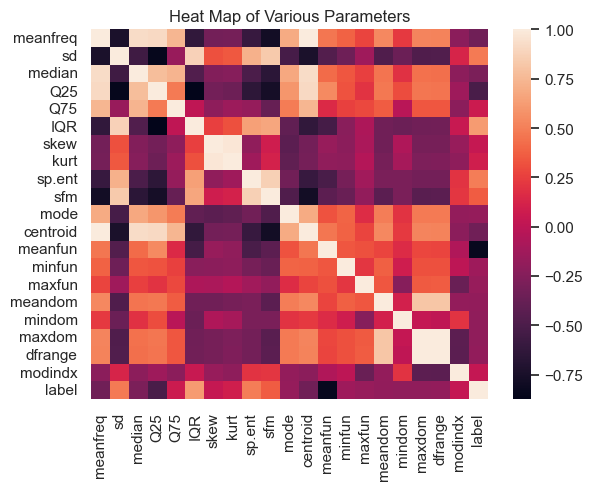

In [12]:
sns.heatmap(numeric_df.corr())
plt.title('Heat Map of Various Parameters')

# Corelation graphs

<Axes: xlabel='meanfreq', ylabel='centroid'>

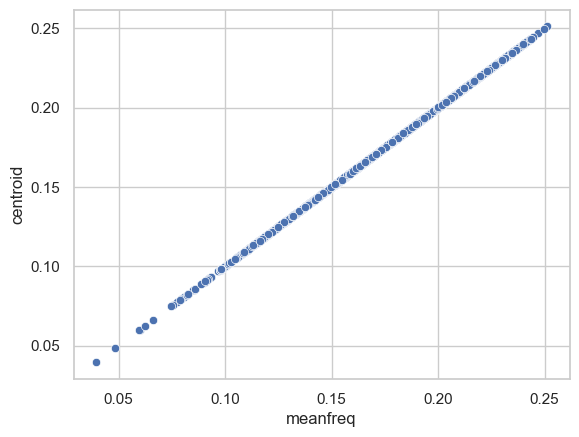

In [13]:
sns.scatterplot(x = 'meanfreq', y = 'centroid', data = data )
# plt.xlabel('Spectral Centroid')
# plt.ylabel('Frequency')

<Axes: xlabel='meanfreq', ylabel='sfm'>

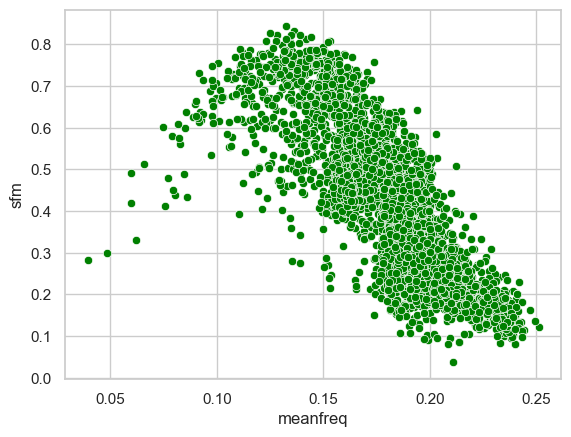

In [14]:

sns.scatterplot(x = 'meanfreq', y = 'sfm', data = data, color = 'green')


## Splitting and Scaling

In [15]:
y = data['label'].copy()
X = data.drop('label', axis = 1).copy()

In [16]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

## Model and Training

In [18]:
X.shape

(3168, 20)

In [19]:
X_train.shape

(2217, 20)

In [20]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [21]:
X_train_reshaped.shape

(2217, 20)

# Using ANN

In [22]:
X_train.shape, y_train.shape


((2217, 20), (2217,))

In [23]:
import tensorflow as tf

def ANN_model():
    inputs = tf.keras.Input(shape=(5, 4, 1))
    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    return model

# Reshape the training data
X_train_reshaped = X_train.reshape(-1, 5, 4, 1)

# Create and compile the model
model = ANN_model()

# Train the model
history_ann = model.fit(
    X_train_reshaped,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)


Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7154 - auc: 0.7444 - loss: 0.5991 - val_accuracy: 0.9730 - val_auc: 0.9948 - val_loss: 0.2260
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9573 - auc: 0.9907 - loss: 0.1897 - val_accuracy: 0.9842 - val_auc: 0.9959 - val_loss: 0.0904
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9737 - auc: 0.9931 - loss: 0.1023 - val_accuracy: 0.9865 - val_auc: 0.9972 - val_loss: 0.0655
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9733 - auc: 0.9965 - loss: 0.0768 - val_accuracy: 0.9865 - val_auc: 0.9974 - val_loss: 0.0567
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9788 - auc: 0.9976 - loss: 0.0625 - val_accuracy: 0.9887 - val_auc: 0.9973 - val_loss: 0.0572
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9783 - auc: 0.9973 - loss: 0.0688 - val_accuracy: 0.9932 - val_auc: 0.9983 - val_loss: 0.0472
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

In [24]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 5, 4, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,709 (65.27 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,140 (43.52 KB)

In [25]:
model.count_params()

5569

In [26]:
# Reshape the test data
X_test_reshaped = X_test.reshape(-1, 5, 4, 1)

# Evaluate the model
ann_loss, ann_accuracy, ann_auc = model.evaluate(X_test_reshaped, y_test)

print("Test Loss:", ann_loss)
print("Test Accuracy:", ann_accuracy)
print("Test AUC:", ann_auc)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9799 - auc: 0.9973 - loss: 0.0635
Test Loss: 0.06759395450353622
Test Accuracy: 0.9789695143699646
Test AUC: 0.996854305267334


# Accuracy and loss graph

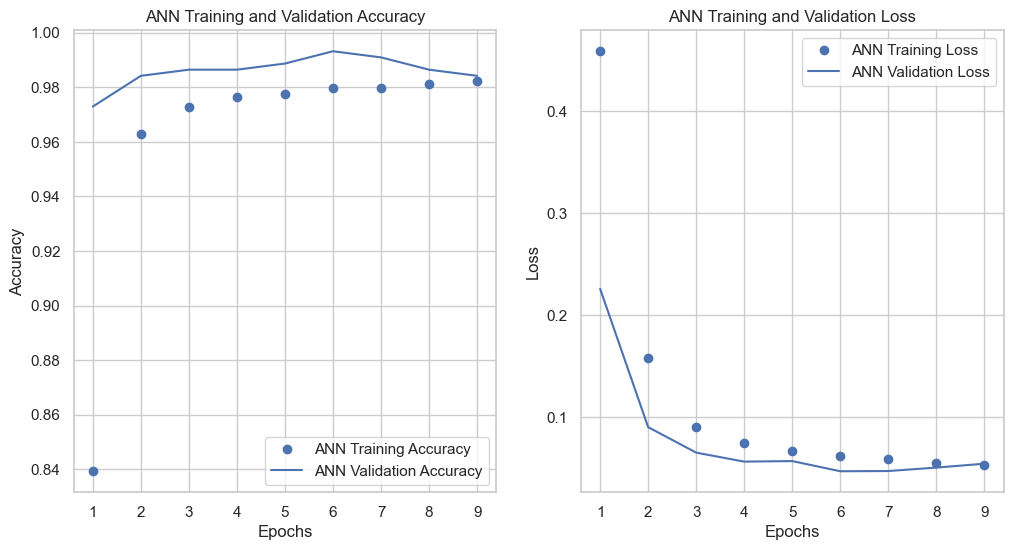

In [27]:
epochs = range(1, len(history_ann.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_ann.history['accuracy'], 'bo', label='ANN Training Accuracy')
plt.plot(epochs, history_ann.history['val_accuracy'], 'b', label='ANN Validation Accuracy')
plt.title('ANN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_ann.history['loss'], 'bo', label='ANN Training Loss')
plt.plot(epochs, history_ann.history['val_loss'], 'b', label='ANN Validation Loss')
plt.title('ANN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Using 2D CNNs

We shall use 2D matrix as dataset
We will rehshape the vector and stack it into square and use the square as a 2 dimensional image

In [28]:
X

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

To make it a perfect square the length of the original vector has to be a perfect square


In [29]:
X.shape

(3168, 20)

We may pad the sequences. The below code will take al our vectors of length 20 and 5 zeros at end of each line

In [30]:
X_train = (tf.keras.preprocessing.sequence.pad_sequences(X_train, dtype = np.float32, maxlen = 25, padding = 'post'))

We can reshape it to keep the the same number of elements for the first dimension but change the other dimensions to be 5x5

Image data has extra dimension to represent the number of color channels

In [31]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))


In [32]:
X_train.shape

(2217, 25)

## Converting into  images

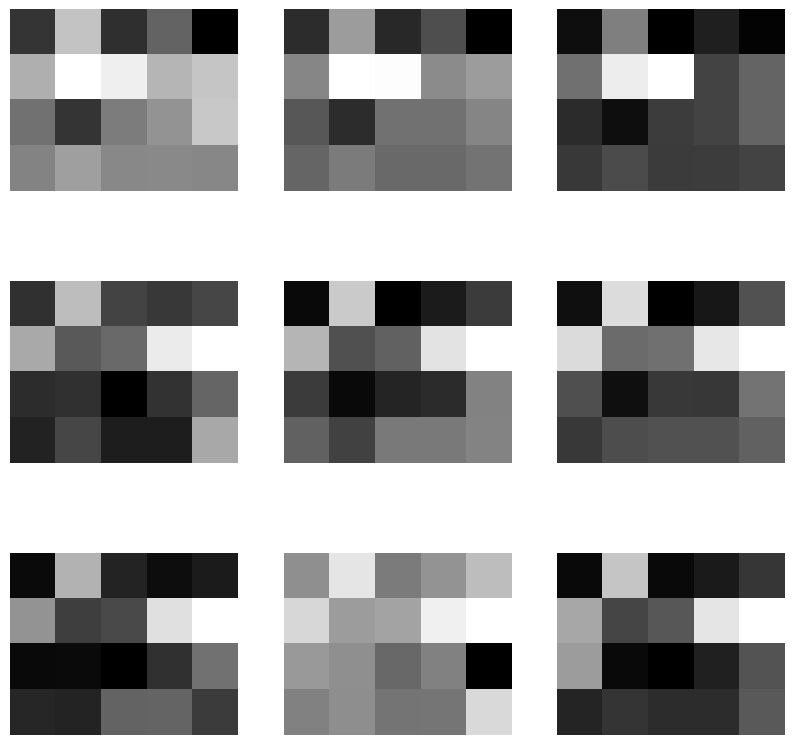

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X contains your image data
# X shape is (9, 20), i.e., 9 grayscale images with 20 pixels each

# Reshape each image to 4x5
X_reshaped = X.reshape(-1, 4, 5)

# Plotting the images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_reshaped[i], cmap='gray')  # Assuming grayscale images
    plt.axis('off')

plt.show()


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, random_state = 42 )

In [35]:
X.shape

(3168, 20)

In [36]:
import tensorflow as tf

# Assuming X contains your image data
input_shape = (20, 20, 1)  # Assuming grayscale images

# Define input layer

    

inputs = tf.keras.Input(shape=input_shape)
                    
# Convolutional layers
x = tf.keras.layers.Conv2D(16, 2, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)
                    
x = tf.keras.layers.Conv2D(32, 1, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)
                    
# Flatten layer
x = tf.keras.layers.Flatten()(x)
                    
# Dense layers
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
                    
# Define the model
model2 = tf.keras.Model(inputs, outputs)

        


In [37]:
model2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 20, 20, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 19, 19, 16)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 9, 9, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 9, 32)            │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,521 (130.94 KB)

 Trainable params: 33,521 (130.94 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model2.count_params()

33521

In [39]:
X_train.shape,y_train.shape

((2217, 20), (2217,))

In [40]:
import tensorflow as tf

def CNN_model():
    
    inputs = tf.keras.Input(shape=(20,))
    
    
    x = tf.keras.layers.Dense(64, activation='relu')(inputs)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    
    
    model2 = tf.keras.Model(inputs, outputs)
    
    model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

    return model2

model2 = CNN_model()

# Train the model
history_cnn = model2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)




Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6819 - loss: 0.5273 - val_accuracy: 0.9527 - val_loss: 0.2493
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9446 - loss: 0.2188 - val_accuracy: 0.9775 - val_loss: 0.1037
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9694 - loss: 0.1065 - val_accuracy: 0.9820 - val_loss: 0.0722
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9709 - loss: 0.0852 - val_accuracy: 0.9842 - val_loss: 0.0604
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9808 - loss: 0.0658 - val_accuracy: 0.9797 - val_loss: 0.0606
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9845 - loss: 0.0543 - val_accuracy: 0.9865 - val_loss: 0.0523
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9756 - loss: 0.0696 - val_accuracy: 0.9887 - val_loss: 0.0510
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9815 - loss: 0.0598 - val_accuracy: 0.9887 - 

In [41]:
model2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,373 (40.52 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,916 (27.02 KB)

In [42]:
model2.count_params()

3457

In [43]:
X_test.shape, y_test.shape

((951, 20), (951,))

In [44]:
# Evaluate the model
cnn_loss, cnn_accuracy = model2.evaluate(X_test, y_test)

print("Test Loss:", cnn_loss)
print("Test Accuracy:", cnn_accuracy)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9780 - loss: 0.0640
Test Loss: 0.06496085226535797
Test Accuracy: 0.9779179692268372


In [45]:
y_pred = model2.predict(X_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


# accuracy and loss graph

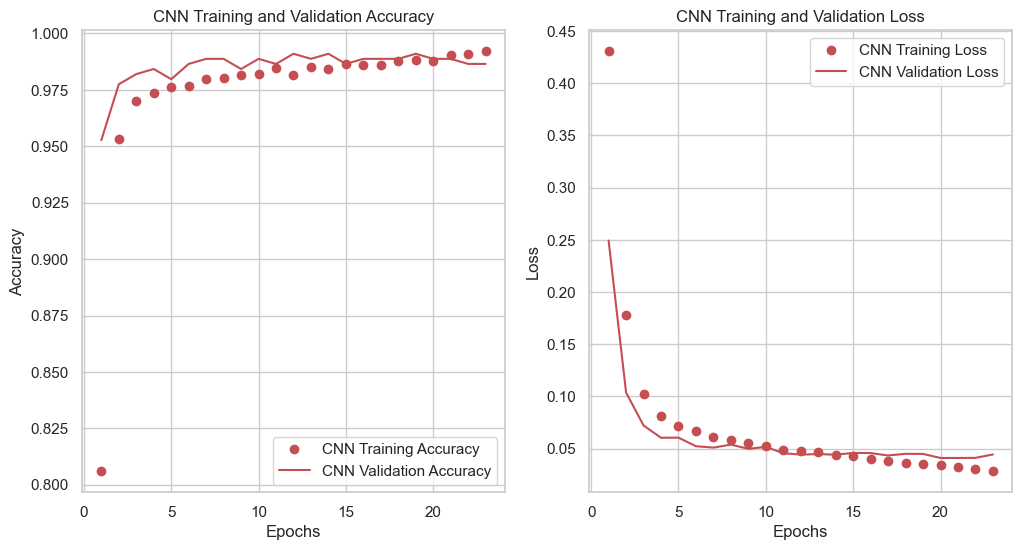

In [46]:
epochs = range(1, len(history_cnn.history['accuracy']) + 1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_cnn.history['accuracy'], 'ro', label='CNN Training Accuracy')
plt.plot(epochs, history_cnn.history['val_accuracy'], 'r', label='CNN Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_cnn.history['loss'], 'ro', label='CNN Training Loss')
plt.plot(epochs, history_cnn.history['val_loss'], 'r', label='CNN Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# USING LSTM


In [47]:
import tensorflow as tf
import numpy as np


# Reshape X_train to match the input shape expected by the model
X_train_reshaped = X_train.reshape(-1, 5, 4)

# Define the model
def LSTM_model() :
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, input_shape=(5, 4)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

model = LSTM_model()

# Train the model
history_lstm = model.fit(
    X_train_reshaped, 
    y_train, 
    validation_split=0.2,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)



C:\Users\Aditi Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5609 - loss: 0.3344 - val_accuracy: 0.8604 - val_loss: 0.1155
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8682 - loss: 0.1081 - val_accuracy: 0.9122 - val_loss: 0.0718
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9076 - loss: 0.0744 - val_accuracy: 0.9437 - val_loss: 0.0561
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9362 - loss: 0.0568 - val_accuracy: 0.9595 - val_loss: 0.0441
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9606 - loss: 0.0436 - val_accuracy: 0.9685 - val_loss: 0.0359
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9633 - loss: 0.0388 - val_accuracy: 0.9707 - val_loss: 0.0323
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9684 - loss: 0.0356 - val_accuracy: 0.9730 - val_loss: 0.0293
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9710 - loss: 0.0325 - val_accuracy: 0.9752 - 

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,333 (231.77 KB)

 Trainable params: 19,777 (77.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,556 (154.52 KB)

In [49]:
# Reshape X_test to match the input shape expected by the model
X_test_reshaped = X_test.reshape(-1, 5, 4)

# Evaluate the model
lstm_loss, lstm_accuracy = model.evaluate(X_test_reshaped, y_test)

print("Test Loss:", lstm_loss)
print("Test Accuracy:", lstm_accuracy)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9819 - loss: 0.0172
Test Loss: 0.017741093412041664
Test Accuracy: 0.9789695143699646


# Accuracy v/s Loss Graph

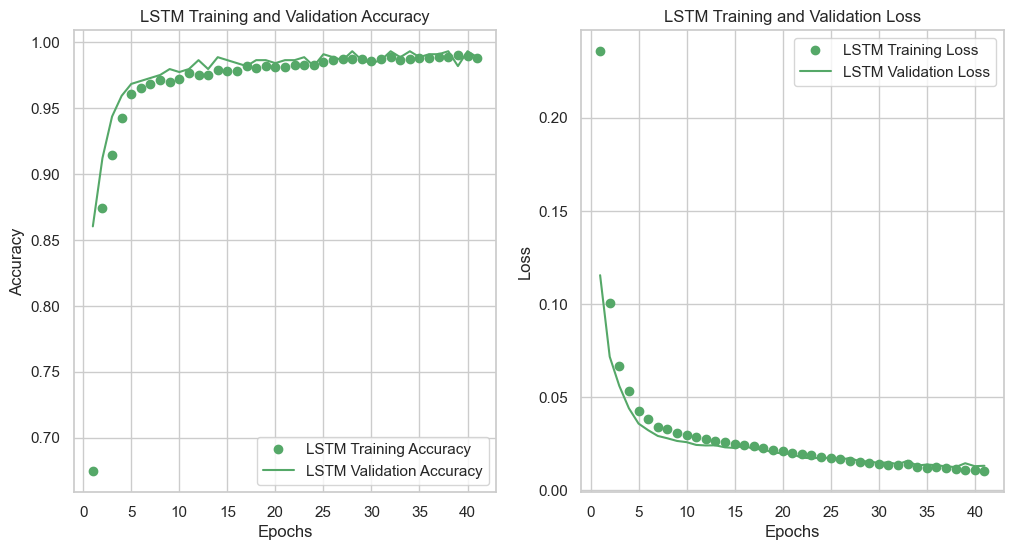

In [50]:

epochs = range(1, len(history_lstm.history['accuracy']) + 1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_lstm.history['accuracy'], 'go', label='LSTM Training Accuracy')
plt.plot(epochs, history_lstm.history['val_accuracy'], 'g', label='LSTM Validation Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_lstm.history['loss'], 'go', label='LSTM Training Loss')
plt.plot(epochs, history_lstm.history['val_loss'], 'g', label='LSTM Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Model Selection using GridSearch cv

In [51]:
X_train.shape,y_train.shape

((2217, 20), (2217,))

In [52]:
# Choose the model with the best accuracy
best_accuracy = max(ann_accuracy, cnn_accuracy, lstm_accuracy)
best_model = None
if best_accuracy == ann_accuracy:
    best_model = "ANN"
elif best_accuracy == cnn_accuracy:
    best_model = "CNN"
else:
    best_model = "LSTM"

print("Best Model:", best_model)

Best Model: ANN


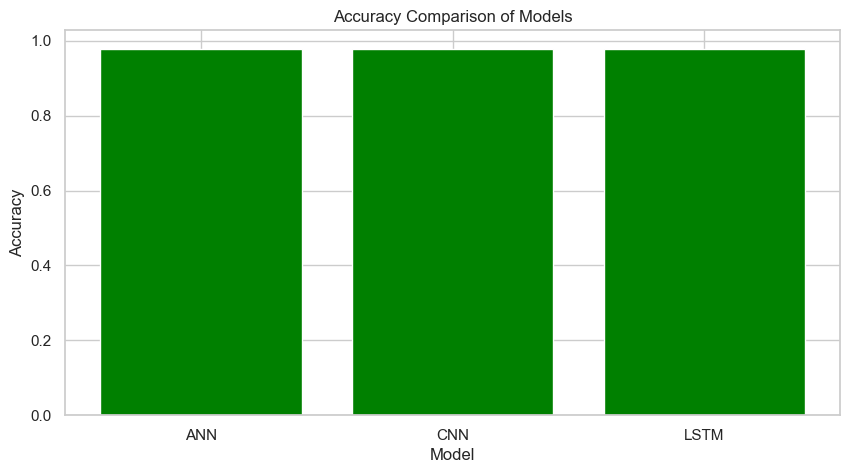

In [53]:
import matplotlib.pyplot as plt

# Define model names
models = ['ANN', 'CNN', 'LSTM']

# Loss values
loss_values = [ann_loss, cnn_loss, lstm_loss]

# Accuracy values
accuracy_values = [ann_accuracy, cnn_accuracy, lstm_accuracy]


# Plot accuracy
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy_values, color='green')
plt.title('Accuracy Comparison of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


# Confusion Matrix for the best model

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [55]:
#convert predicted probablities to binary predictions
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

In [56]:
cm  = confusion_matrix(y_test, y_pred_binary)

<Figure size 800x600 with 0 Axes>

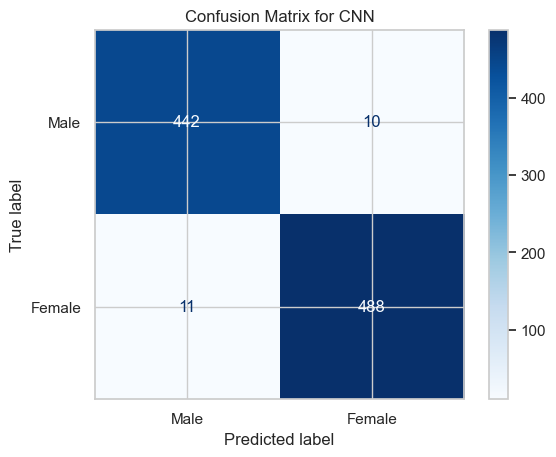

In [57]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Male', 'Female'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for CNN')
plt.show()